## IT302 Project 2021

#### Team members

1. Anand Kumar (191IT104)

2. Ashok Kumar (191IT210)

3. Vishal Kumar (191IT258)

### IPL Data Analysis and Winning Prediction model

The Indian Premier League is a professional Twenty20 cricket league, contested by eight teams based out of eight different Indian cities. Being a fan of the IPL, I was drawn to this dataset as soon as I saw it on Kaggle. I did some EDA and found some really cool insights which I am here to share. Please share any insights, suggestions through comments.

### About the Dataset

This dataset consists of two seperate CSV files : matches and deliveries. These files contain information of each match summary and ball by ball details, respectively.

Understanding The DATASET:
<pre>
 The Data-Set For IPL Match Prediction Consists Of 18 Columns:

 Id: The Match Id To Uniquely Identify Each Match.
 Season: The Season On Which The Match Was Held.
 City: The Name Of The City Where The Match Was Held.
 Date: The Date On Which The Match Was Held.
 Team1: The Name Of Team1.
 Team2: The Name Of Team2.
 Toss_winner: The Toss Winner Team Takes The Decision To Take Bat Or Field. 
 Toss_decision: The Toss Winner Team Takes The Decision Bat Or Field.
 Result: The Result Of A Normal, Tie, Or No Result.
 Dl_applied: If DL Rules Applied Or Not Applied.
 Winner: The Name Of The Winning Team Name.
 result_margin: By how many runs or how many wickets team won.
 Player_of_match: The Name Of The Player Name.
 Venue: The Name Of The Stadium.
 Umpire1: The Name Of The On-Field Umpire.
 Umpire2: The Name Of The On-Field Umpire.
 Umpire3: The Name Of The Third Umpire. 
 </pre>

# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
sns.set_style("white")
sns.set_palette("husl", 14, 1)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Data Preparation and Cleaning

**Matches**

In [ ]:
matches = pd.read_csv("./drive/MyDrive/Pns_data/IPL-Matches-2008-2020.csv")
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


**Checking for NULL values**

In [ ]:
match_na = matches.isna().sum()
match_na[match_na > 0]

city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64


After inspecting the dataset we found that the columns winner, result, player_of_match has 4 nans. 

We found that the matches that were tied due to rains have nans in these columns. 

We can drop the nan rows as it will not affect our analysis.

In [ ]:
matches = matches.dropna(subset = ['winner', 'result', 'player_of_match'])
matches.shape

(812, 17)

The column 'method' has the highest number of NaNs in the dataset. The best course of action would probably be to drop the entire column. However, the rows where the 'method' column does have values are those matches where D/L method was used. Let us store it in another DataFrame and drop 'method' from matches.

In [ ]:
DL = matches.dropna(subset = ['method'])
matches = matches.drop('method', axis = 1)

In [ ]:
DL.shape

# DL.head()

(19, 17)

**Matches that were held in Dubai International Stadium had NaNs in their city column.**

In [ ]:
matches.loc[matches.city.isna(), 'city'] = 'Dubai'

**Lets take a look at the 'result_margin' column which has na values.**

In [ ]:
matches.loc[matches.result_margin.isna()].head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,Aleem Dar,AK Chaudhary


In [ ]:
print(matches.loc[matches.result_margin.isna()].size)


208


**After close inspection, we found that result_margin has nans in matches that were tied.**

In [ ]:
matches.loc[matches.result == 'tie', 'result_margin'] = 0

Let's see if all the na values are taken care of...

In [ ]:
match_na = matches.isna().sum()
match_na[match_na > 0]

Series([], dtype: int64)

After inspecting the matches dataset, we found that the team 'Rising Pune Supergiant' is written as 'Rising Pune Supergiants'. Also, Delhi Daredevils and Delhi Capitals are the same team. 

So let's fix that

In [ ]:
matches.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
matches.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [ ]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

In [ ]:
matches.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

**Deliveries**

In [ ]:
deliveries = pd.read_csv('./drive/MyDrive/Pns_data/IPL-Ball-by-Ball -2008-2020.csv')
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

Let's fix the team names same as Matches.

In [ ]:
deliveries.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [ ]:
deliveries.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

In [ ]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiant', 'Gujarat Lions'],
      dtype=object)


# Exploratory Data Analysis


**How many matches are played each year in IPL?**

In [ ]:
matches["date"].head()

0    2008-04-18
1    2008-04-19
2    2008-04-19
3    2008-04-20
4    2008-04-20
Name: date, dtype: object

In [ ]:
matches["Year"] = matches["date"].apply(lambda x:x.split("-")[0])
matches['Year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [ ]:
match_count = matches['Year'].value_counts().sort_index()

In [ ]:
match_count

2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    60
2015    57
2016    60
2017    59
2018    60
2019    59
2020    60
Name: Year, dtype: int64

In [ ]:
import plotly.express as px

fig = px.bar(match_count, x= match_count.index, y=match_count.values,
            labels=dict(index="year",y="Total matches"))

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Number of matches per year",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Year",
       yaxis_title="Number of matches")
fig.show()

**Year 2013 witnessed most matches throughout 2008 - 2020**

**How many matches did the teams played throughout the IPL(2008-2020)?**

In [ ]:
# Total matches played by a team

partial_count1 = matches['team1'].value_counts()
partial_count2 = matches['team2'].value_counts()
total_matches = np.add(partial_count1, partial_count2).sort_values(ascending = False)
total_matches.head()

Mumbai Indians                 203
Royal Challengers Bangalore    192
Kolkata Knight Riders          192
Delhi Capitals                 192
Kings XI Punjab                190
dtype: int64

In [ ]:

fig = px.bar(total_matches, x= total_matches.index, y=total_matches.values,
            labels=dict(index="Team",y="Total matches"))

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Number of matches played by each team",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Team",
       yaxis_title="Number of matches")
fig.show()

### **Does winning the toss affects the outcome of a match for a team?**<br>

In [ ]:
toss_match_wins = matches.loc[(matches['toss_winner'] == matches['winner']), 'toss_winner'].value_counts()
toss_match_wins.head()

Mumbai Indians           61
Chennai Super Kings      61
Kolkata Knight Riders    55
Delhi Capitals           45
Rajasthan Royals         44
Name: toss_winner, dtype: int64

In [ ]:
win_per_after_toss = np.divide(toss_match_wins, total_matches)*100

In [ ]:
win_per_after_toss

Chennai Super Kings            34.269663
Deccan Chargers                25.333333
Delhi Capitals                 23.437500
Gujarat Lions                  33.333333
Kings XI Punjab                18.947368
Kochi Tuskers Kerala           28.571429
Kolkata Knight Riders          28.645833
Mumbai Indians                 30.049261
Pune Warriors                   6.666667
Rajasthan Royals               27.672956
Rising Pune Supergiant         26.666667
Royal Challengers Bangalore    22.395833
Sunrisers Hyderabad            23.387097
dtype: float64

In [ ]:
fig = px.bar(win_per_after_toss, x= win_per_after_toss.index, y=win_per_after_toss.values,
            labels=dict(index="Team",y="Pecentage"), color =win_per_after_toss.values )

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-45, tickfont=dict(family='Rockwell', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Win % of Teams that won Toss",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Teams",
       yaxis_title="Winning percentage")
fig.show()


> *All the percentages are below 50%, hence there isn't any evidence that suggests that winning the toss would increase the chances of winning the match.*

####  Here We just want to see what would be the chances for a certain team to win a match if it wins the toss.


In [ ]:
# When Teams won the toss as well as the match
match_win = matches.loc[matches['winner'] == matches['toss_winner'], 'toss_winner'].value_counts()

# Won toss but lost match = Total times teams won toss - WON both toss and match 
match_lose = matches['toss_winner'].value_counts() - match_win
match_lose

Chennai Super Kings            36
Deccan Chargers                24
Delhi Capitals                 54
Gujarat Lions                   5
Kings XI Punjab                49
Kochi Tuskers Kerala            4
Kolkata Knight Riders          43
Mumbai Indians                 45
Pune Warriors                  17
Rajasthan Royals               41
Rising Pune Supergiant          5
Royal Challengers Bangalore    43
Sunrisers Hyderabad            28
Name: toss_winner, dtype: int64

In [ ]:
ticks = ['CSK', 'DC', 'DelhiC', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR', 'RPS', 'RCB', 'SRH']
match_win.sort_index(inplace = True)
match_lose.sort_index(inplace = True)
x = np.arange(len(ticks))
width = 0.4

In [ ]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

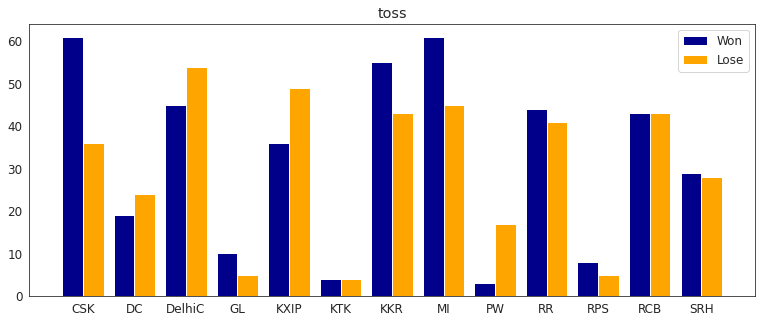

In [ ]:
plt.bar(x = x-0.2, height = match_win.values, width = width, label = 'Won', color = 'darkblue')
plt.bar(x = x+0.2, height = match_lose.values, width = width, label = 'Lose', color = 'orange')
plt.xticks(x, ticks)
plt.legend()
_ = plt.title('toss')

> **We can see that there are teams that have actually lost more matches than they have won after winning the toss**

### General analysis now !!

**Which team has the highest win percentage? in general**

In [ ]:
winner_counts = matches['winner'].value_counts()
win_per = np.round(np.divide(winner_counts, total_matches)*100).sort_values(ascending = False)
win_per.head()

Chennai Super Kings      60.0
Mumbai Indians           59.0
Sunrisers Hyderabad      53.0
Kolkata Knight Riders    52.0
Rajasthan Royals         51.0
dtype: float64

In [ ]:
fig = px.bar(win_per, x= win_per.index, y=win_per.values,
            labels=dict(index="Team",y="Winning Pecentage"), color = win_per.index)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-45, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Teams Win %",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Teams",
       yaxis_title="Winning percentage")
fig.show()



#### **Which batsman hit the most number of sixes?**

In [ ]:
batsman_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby(by = ['batsman']).agg(sixes=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'sixes').droplevel('batsman_runs')
batsman_sixes.head()

,sixes
batsman,
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,214
V Kohli,202


In [ ]:
fig = px.bar(batsman_sixes, x= batsman_sixes.index, y=batsman_sixes.sixes,
            labels=dict(batsman="Batsman",sixes="Sixes"), color = batsman_sixes.sixes)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-30, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Batsmen - Highest number of 6s hit",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Batsmen",
       yaxis_title="Sixes")
fig.show()



> **Chris Gayle hit the highest number of sixes during the IPL.**

**Which batsman hit the most number of 4s?**

In [ ]:
batsman_4s = deliveries[deliveries['batsman_runs'] == 4].groupby(by = ['batsman']).agg(fours=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'fours').droplevel('batsman_runs')
batsman_4s.head()

,fours
batsman,
S Dhawan,591
DA Warner,510
V Kohli,504
SK Raina,493
G Gambhir,492


In [ ]:
fig = px.bar(batsman_4s, x= batsman_4s.index, y=batsman_4s.fours,
            labels=dict(batsman="Batsman",fours="Sixes"), color = batsman_4s.fours)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Batsmen - Highest number of 4s hit",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Batsmen",
       yaxis_title="Fours")
fig.show()


> **Shikhar Dhavan hit the most number of 4s.**

**Which bowler gave the most number of 6s?**

In [ ]:
bowler_6s = deliveries[deliveries['batsman_runs'] == 6].groupby(by = ['bowler']).agg(sixes=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'sixes').droplevel('batsman_runs')
bowler_6s.head()

,sixes
bowler,
PP Chawla,181
A Mishra,172
RA Jadeja,148
Harbhajan Singh,142
DJ Bravo,138


In [ ]:
fig = px.bar(bowler_6s, x= bowler_6s.index, y=bowler_6s.sixes,
            labels=dict(bowler="Bowler",sixes="Sixes given"), color =bowler_6s.sixes )

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Bwlers - Highest number of 6s given",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Bowlers",
       yaxis_title="Sixes given")
fig.show()


> **Batsmen hit most number of 6s against PP Chawla**

**Which bowler gave the most number of 4s?**

In [ ]:
bowler_4s = deliveries[deliveries['batsman_runs'] == 4].groupby(by = ['bowler']).agg(fours=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'fours').droplevel(1)

In [ ]:
fig = px.bar(bowler_4s, x= bowler_4s.index, y=bowler_4s.fours,
            labels=dict(bowler="Bowler",fours="Fours given"), color =bowler_4s.fours )

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Bwlers - Highest number of 4s given",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Bowlers",
       yaxis_title="Fours given")
fig.show()


> **Batsmen hit most number of 4s against UT Yadav**

### Whether the teams batting in Inning1 has more advantage over their rival teams. 

**Which teams are more likely to win ?**

In [ ]:
total_runs_inning = deliveries.groupby(by =['id', 'inning']).agg({'total_runs':'sum'}).reset_index()
winners_ = pd.pivot_table(data = total_runs_inning, columns = 'inning', index = 'id', values = 'total_runs')
winners_['won'] = np.where(winners_[1]>winners_[2], 'Innings 1', 'Innings 2')
winners_['won'] = np.where(winners_[1]==winners_[2], 'draw', winners_['won'])
winners_.head()

inning,1,2,won
id,,,
335982,222.0,82.0,Innings 1
335983,240.0,207.0,Innings 1
335984,129.0,132.0,Innings 2
335985,165.0,166.0,Innings 2
335986,110.0,112.0,Innings 2


In [ ]:

fig = px.histogram(winners_, x="won",labels=dict(won="Won By"), color = "won")

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.70))
fig.update_yaxes(domain=(0, 0.60))

fig.update_layout(
    title={
        'text': "Matches won",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Won",
       yaxis_title="Count")
fig.show()


>**We can see that the teams playing in the second innings have a slightly better chance at winning. So getting to bat first may not always be the correct alernative.**

**Which player was awarded the Player of the Match most number of times?**

In [ ]:
pom = matches['player_of_match'].value_counts().sort_values(ascending=False).iloc[:10]


In [ ]:
fig = px.bar(matches, x= pom.index, y=pom.values,
            labels=dict(x="Player",y="No of times"), color = pom.index)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Player of the match",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Player",
       yaxis_title="Count")
fig.show()


> *AB de Villiers was awarded Player of the match most number of times.*

Let's move on to some **Player Statistics**.

Let's count the Centuries scored by each batsmen in each match. Also, we would like to have other information on our batsmen say, Strike rate, total runs scored and balls faced.

In [ ]:
runs = deliveries.groupby(by =['batsman', 'id']).agg({'batsman_runs':'sum'})
centuries = runs['batsman_runs'].apply(lambda x: (x // 100)).sum(level = 0)


#### Wides and noballs are **not** counted in batsman's record as well as any runs scored on an extras_type ball. 

So in order to account for that we are not considering wides, noballs, penalty.

In [ ]:
k = deliveries[~(deliveries['extras_type'].isin(['wides', 'noballs', 'penalty']))]

In [ ]:
batsman_stats = k.groupby(by =['batsman']).agg({'batsman_runs':'sum', 'ball': 'count'})
batsman_stats['Strike_rate'] = 100*batsman_stats['batsman_runs']/batsman_stats['ball']
batsman_stats['Centuries'] = centuries
batsman_stats.head()

,batsman_runs,ball,Strike_rate,Centuries
batsman,,,,
A Ashish Reddy,280,193,145.077720,0
A Chandila,4,7,57.142857,0
A Chopra,53,71,74.647887,0
A Choudhary,25,20,125.000000,0
A Dananjaya,4,5,80.000000,0


**Which player scored the most number of centuries?**

In [ ]:
top10 = batsman_stats.nlargest(n = 10, columns = 'Centuries')
top10

,batsman_runs,ball,Strike_rate,Centuries
batsman,,,,
CH Gayle,4731,3164,149.525917,6
V Kohli,5863,4480,130.870536,5
DA Warner,5224,3694,141.418517,4
SR Watson,3858,2797,137.933500,4
AB de Villiers,4816,3181,151.398931,3
AC Gilchrist,2046,1483,137.963587,2
AM Rahane,3931,3236,121.477132,2
BA Stokes,919,678,135.545723,2
BB McCullum,2855,2172,131.445672,2


In [ ]:
fig = px.bar(top10, x= top10.index, y=top10["Centuries"],color=top10["Centuries"]
           )

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Player - Highest number of Centuries",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Player",
       yaxis_title="No. of Centuries")
fig.show()


> *Chris Gayle scored 6 centuries which is the highest of all.*

**Which batsman has the highest runs?**

In [ ]:
top10 = batsman_stats.nlargest(n = 10, columns = 'batsman_runs')
top10


,batsman_runs,ball,Strike_rate,Centuries
batsman,,,,
V Kohli,5863,4480,130.870536,5
SK Raina,5345,3895,137.227214,1
DA Warner,5224,3694,141.418517,4
RG Sharma,5200,3991,130.293160,1
S Dhawan,5170,4082,126.653601,2
AB de Villiers,4816,3181,151.398931,3
CH Gayle,4731,3164,149.525917,6
MS Dhoni,4611,3371,136.784337,0
RV Uthappa,4595,3528,130.243764,0


In [ ]:
fig = px.bar(top10, x= top10.index, y=top10["batsman_runs"],color=top10["batsman_runs"])

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Players - Highest number of Runs",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Player",
       yaxis_title="Runs")
fig.show()


> *Virat Kohli scored the highest number of runs throuhout the IPL.*

 **Which player has the highest strike rate?**

In [ ]:
top10 = batsman_stats.nlargest(n = 10, columns = 'Strike_rate')
top10

# 2009 when Pakistani players also played the IPL

,batsman_runs,ball,Strike_rate,Centuries
batsman,,,,
B Stanlake,5,2,250.000000,0
Umar Gul,39,19,205.263158,0
RS Sodhi,4,2,200.000000,0
AD Russell,1509,826,182.687651,0
Shahid Afridi,81,46,176.086957,0
I Malhotra,7,4,175.000000,0
TU Deshpande,21,12,175.000000,0
LJ Wright,102,59,172.881356,0
KK Cooper,115,67,171.641791,0


In [ ]:

fig = px.bar(top10, x= top10.index, y=top10["Strike_rate"],color=top10["Strike_rate"])

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Batsmen - Highest Strike Rate",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Player",
       yaxis_title="Strike Rate")
fig.show()




> *B Stanlake has the highest Strike rate.*

Similarly, we would also like to have some statistics on our bowlers as well, for e.g. total wickets, Maidens, Strike rate (balls / wicket), Bowling Average (Total runs / wickets).<br><br>
**Data Preparation.**

In [ ]:
run_per_over = deliveries.groupby(by =['bowler', 'id', 'over']).agg({'total_runs':'sum'})
maidens = run_per_over['total_runs'].apply(lambda x: x == 0).sum(level = 0)

In [ ]:
bowler_stats = deliveries.groupby(by ='bowler').agg({'total_runs':'sum', 'ball': 'count', 'is_wicket':'sum'})
bowler_stats['Strike_rate'] = np.divide(bowler_stats['ball'], bowler_stats['is_wicket'])
bowler_stats['BowlingAve'] = np.divide(bowler_stats['total_runs'], bowler_stats['is_wicket'])
bowler_stats['Maidens'] = maidens.astype('int32')
bowler_stats.head()

,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
bowler,,,,,,
A Ashish Reddy,400,270,19,14.210526,21.052632,0
A Chandila,245,234,11,21.272727,22.272727,0
A Choudhary,144,108,5,21.600000,28.800000,2
A Dananjaya,47,25,0,inf,inf,0
A Flintoff,106,66,2,33.000000,53.000000,0


**Which Bowler has delivered the most balls?**

In [ ]:
top10 = bowler_stats.nlargest(n = 10, columns = 'ball')
top10


,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
bowler,,,,,,
Harbhajan Singh,4038,3451,161,21.434783,25.080745,4
R Ashwin,3756,3327,153,21.745098,24.549020,5
PP Chawla,4330,3285,164,20.030488,26.402439,1
A Mishra,3913,3233,169,19.130178,23.153846,4
SL Malinga,3486,2974,188,15.819149,18.542553,8
DJ Bravo,3869,2846,175,16.262857,22.108571,6
SP Narine,3208,2824,143,19.748252,22.433566,4
B Kumar,3333,2795,146,19.143836,22.828767,7
RA Jadeja,3515,2759,122,22.614754,28.811475,1


In [ ]:

fig = px.bar(top10, x= top10.index, y=top10["ball"],color=top10["ball"])

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Bowlers - Highest number of Balls delivered",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Bowlers",
       yaxis_title="Balls")
fig.show()




> *Harbhajan Singh delivered the most balls.*

**Which bowler took the most wickets?**

In [ ]:
top10 = bowler_stats.nlargest(n = 10, columns = 'is_wicket')
top10

,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
bowler,,,,,,
SL Malinga,3486,2974,188,15.819149,18.542553,8
DJ Bravo,3869,2846,175,16.262857,22.108571,6
A Mishra,3913,3233,169,19.130178,23.153846,4
PP Chawla,4330,3285,164,20.030488,26.402439,1
Harbhajan Singh,4038,3451,161,21.434783,25.080745,4
R Ashwin,3756,3327,153,21.745098,24.549020,5
B Kumar,3333,2795,146,19.143836,22.828767,7
SP Narine,3208,2824,143,19.748252,22.433566,4
UT Yadav,3672,2642,137,19.284672,26.802920,3


In [ ]:

fig = px.bar(top10, x= top10.index, y=top10["is_wicket"], color=top10.index)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Bowlers - Highest number of Wickets",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Bowlers",
       yaxis_title="Wickets")
fig.show()

> *SL Malinga took the most number of wickets.*

**Which bowler delivered the most number of Maidens?**

In [ ]:
top10 = bowler_stats.nlargest(n = 10, columns = 'Maidens')
top10

,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
bowler,,,,,,
P Kumar,3342,2637,102,25.852941,32.764706,12
IK Pathan,2711,2113,99,21.343434,27.383838,9
DW Steyn,2568,2276,105,21.676190,24.457143,8
SL Malinga,3486,2974,188,15.819149,18.542553,8
B Kumar,3333,2795,146,19.143836,22.828767,7
DS Kulkarni,2465,1850,91,20.329670,27.087912,7
DJ Bravo,3869,2846,175,16.262857,22.108571,6
Sandeep Sharma,2686,2128,117,18.188034,22.957265,6
DL Chahar,1286,1046,45,23.244444,28.577778,5


In [ ]:

fig = px.bar(top10, x= top10.index, y=top10["Maidens"],color=top10.index)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 Bowlers - Highest number of Maidens delivered",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Bowlers",
       yaxis_title="Maidens")
fig.show()

> *P Kumar delivered the most number of maiden.*

**Which batsmen has played the most number of matches throughout the IPL?**

In [ ]:
matches_played_batsman = deliveries.groupby(by = ['batsman', 'id'], as_index=False).size().reset_index()['batsman'].value_counts()
matches_played_batsman = matches_played_batsman.sort_values(ascending = False).iloc[:10]

In [ ]:

fig = px.bar(matches_played_batsman, x= matches_played_batsman.index, y=matches_played_batsman.values
            ,labels=dict(index="Batsman",y="No of matches"), color=matches_played_batsman.values)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 - Highest number of matches played by Batsmen",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Batsmen",
       yaxis_title="No of matches")
fig.show()


> *Rohit Sharma has played the most number of matches.*

**Which bowlers played the most number of matches throughout the IPL?**

In [ ]:
matches_played_bowler = deliveries.groupby(by = ['bowler', 'id'], as_index=False).size().reset_index()['bowler'].value_counts()
matches_played_bowler = matches_played_bowler.sort_values(ascending = False).iloc[:10]

In [ ]:

fig = px.bar(matches_played_bowler, x= matches_played_bowler.index, y=matches_played_bowler.values
             ,labels=dict(index="Bowler",y="No of matches"), color=matches_played_bowler.index)

fig.update_xaxes(title_font_family="Arial")
fig.update_xaxes(tickangle=-40, tickfont=dict(family='Rainbow', color='crimson', size=14))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_xaxes(domain=(0, 0.85))
fig.update_yaxes(domain=(0, 0.85))

fig.update_layout(
    title={
        'text': "Top 10 - Highest number of matches played by Batsmen",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title="Bowler",
       yaxis_title="No of matches")
fig.show()

> *PP Chawla has played the most number of matches.*

## Predicting the Winners 

In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
train = pd.read_csv("./drive/MyDrive/Pns_data/IPL-Matches-2008-2020.csv")

test = pd.read_csv("./drive/MyDrive/Pns_data/IPL_Matches_2021.csv")

In [ ]:
train.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
test.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,1254058,Chennai,2021-04-09,HV Patel,"MA Chidambaram Stadium, Chepauk, Chennai",0,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,2.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon
1,1254059,Mumbai,2021-04-10,S Dhawan,"Wankhede Stadium, Mumbai",0,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,7.0,N,NaN,AK Chaudhary,VK Sharma
2,1254060,Chennai,2021-04-11,N Rana,"MA Chidambaram Stadium, Chepauk, Chennai",0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kolkata Knight Riders,runs,10.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon
3,1254061,Mumbai,2021-04-12,SV Samson,"Wankhede Stadium, Mumbai",0,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,Punjab Kings,runs,4.0,N,NaN,AK Chaudhary,S Ravi
4,1254062,Chennai,2021-04-13,RD Chahar,"MA Chidambaram Stadium, Chepauk, Chennai",0,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,Mumbai Indians,runs,10.0,N,NaN,C Shamshuddin,CB Gaffaney


In [ ]:
train.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
(test.columns == train.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

### Combining Training and Testing Data

In [ ]:
test.shape

(60, 17)

In [ ]:
train.shape

(816, 17)

In [ ]:
train.drop(columns=['method','eliminator'],inplace=True)
test.drop(columns=['method','eliminator'],inplace=True)

In [ ]:
total = train.append(test,ignore_index=True)
total.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


In [ ]:
test.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
55,1254113,Dubai,2021-10-08,Srikar Bharat,Dubai International Cricket Stadium,0,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,KN Ananthapadmanabhan,Nitin Menon
56,1254114,Dubai,2021-10-10,Ruturaj Gaikwad,Dubai International Cricket Stadium,0,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,Nitin Menon,Richard Lllingworth
57,1254115,Sharjah,2021-10-11,Sunil Narine,"Sharjah Cricket Stadium, Sharjah",0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Kolkata Knight Riders,wickets,4.0,Chris Gaffaney,Virendra Sharma
58,1254116,Sharjah,2021-10-13,Venkatessh Iyer,"Sharjah Cricket Stadium, Sharjah",0,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,KN Ananthapadmanabhan,Michael Gough
59,1254117,Dubai,2021-10-15,Faf Du Plessis,Dubai International Cricket Stadium,0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,runs,27.0,Nitin Menon,Richard Lllingworth


In [ ]:
total.tail(7)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
869,1254111,Sharjah,2021-10-07,Shivam Mavi,"Sharjah Cricket Stadium, Sharjah",0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,Kolkata Knight Riders,runs,86.0,Michael Gough,Sayed Khalid
870,1254112,Abu Dhabi,2021-10-08,Ishan Kishan,"Zayed Cricket Stadium, Abu Dhabi",0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,runs,42.0,Tapan Sharma,Virendra Sharma
871,1254113,Dubai,2021-10-08,Srikar Bharat,Dubai International Cricket Stadium,0,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,KN Ananthapadmanabhan,Nitin Menon
872,1254114,Dubai,2021-10-10,Ruturaj Gaikwad,Dubai International Cricket Stadium,0,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,Nitin Menon,Richard Lllingworth
873,1254115,Sharjah,2021-10-11,Sunil Narine,"Sharjah Cricket Stadium, Sharjah",0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Kolkata Knight Riders,wickets,4.0,Chris Gaffaney,Virendra Sharma
874,1254116,Sharjah,2021-10-13,Venkatessh Iyer,"Sharjah Cricket Stadium, Sharjah",0,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,KN Ananthapadmanabhan,Michael Gough
875,1254117,Dubai,2021-10-15,Faf Du Plessis,Dubai International Cricket Stadium,0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,runs,27.0,Nitin Menon,Richard Lllingworth


### Removing Irrelevant Features

In [ ]:
total.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
total.drop(columns=['toss_winner','toss_decision','result','id','date',
                    'neutral_venue','result_margin'],inplace=True)

In [ ]:
total.describe(include='object')

,city,player_of_match,venue,team1,team2,winner,umpire1,umpire2
count,863,872,876,876,876,872,876,876
unique,32,260,42,16,16,16,61,62
top,Mumbai,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,HDPK Dharmasena,S Ravi
freq,111,25,77,116,112,127,78,87


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             863 non-null    object
 1   player_of_match  872 non-null    object
 2   venue            876 non-null    object
 3   team1            876 non-null    object
 4   team2            876 non-null    object
 5   winner           872 non-null    object
 6   umpire1          876 non-null    object
 7   umpire2          876 non-null    object
dtypes: object(8)
memory usage: 54.9+ KB


### Pre-Processing the Data

In [ ]:
total['umpire1'].fillna('HDPK Dharmasena',inplace=True)
total['umpire2'].fillna('S Ravi',inplace=True)
total['city'].fillna('Dubai',inplace=True)

In [ ]:
# total.tail()

In [ ]:
total['player_of_match']=total['player_of_match'].fillna('None')
total

,city,player_of_match,venue,team1,team2,winner,umpire1,umpire2
0,Bangalore,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,Asad Rauf,RE Koertzen
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,MR Benson,SL Shastri
2,Delhi,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,Aleem Dar,GA Pratapkumar
3,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,SJ Davis,DJ Harper
4,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...
871,Dubai,Srikar Bharat,Dubai International Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,KN Ananthapadmanabhan,Nitin Menon
872,Dubai,Ruturaj Gaikwad,Dubai International Cricket Stadium,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,Nitin Menon,Richard Lllingworth
873,Sharjah,Sunil Narine,"Sharjah Cricket Stadium, Sharjah",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,Chris Gaffaney,Virendra Sharma
874,Sharjah,Venkatessh Iyer,"Sharjah Cricket Stadium, Sharjah",Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,KN Ananthapadmanabhan,Michael Gough


In [ ]:
total['winner'].fillna('No Result',inplace=True)

In [ ]:
total.replace({ 'Rising Pune Supergiant':'Rising Pune Supergiants',
                'Delhi Daredevils':'Delhi Capitals',
                'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                'Feroz Shah Kotla Ground':'Feroz Shah Kotla'},inplace=True)

In [ ]:
total.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings',
                 'Rajasthan Royals','Gujarat Lions','Kings XI Punjab','Pune Warriors',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Delhi Capitals','Dubai (DSC)','Deccan Chargers']
                ,['MI','KKR','RCB','CSK','RR','GL','KXIP','PW','SRH','RPS','KTK','DC','Dubai','DEC'],inplace=True)

In [ ]:
total

,city,player_of_match,venue,team1,team2,winner,umpire1,umpire2
0,Bangalore,BB McCullum,M. Chinnaswamy Stadium,RCB,KKR,KKR,Asad Rauf,RE Koertzen
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,MR Benson,SL Shastri
2,Delhi,MF Maharoof,Feroz Shah Kotla,DC,RR,DC,Aleem Dar,GA Pratapkumar
3,Mumbai,MV Boucher,Wankhede Stadium,MI,RCB,RCB,SJ Davis,DJ Harper
4,Kolkata,DJ Hussey,Eden Gardens,KKR,DEC,KKR,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...
871,Dubai,Srikar Bharat,Dubai International Cricket Stadium,DC,RCB,RCB,KN Ananthapadmanabhan,Nitin Menon
872,Dubai,Ruturaj Gaikwad,Dubai International Cricket Stadium,DC,CSK,CSK,Nitin Menon,Richard Lllingworth
873,Sharjah,Sunil Narine,"Sharjah Cricket Stadium, Sharjah",RCB,KKR,KKR,Chris Gaffaney,Virendra Sharma
874,Sharjah,Venkatessh Iyer,"Sharjah Cricket Stadium, Sharjah",DC,KKR,KKR,KN Ananthapadmanabhan,Michael Gough


#### Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(total.winner)
total['team1']=le.transform(total.team1)
total['team2']=le.transform(total.team2)

In [ ]:
total['winner']=le.transform(total.winner)

In [ ]:
total.head()

,city,player_of_match,venue,team1,team2,winner,umpire1,umpire2
0,Bangalore,BB McCullum,M. Chinnaswamy Stadium,11,4,4,Asad Rauf,RE Koertzen
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",6,0,0,MR Benson,SL Shastri
2,Delhi,MF Maharoof,Feroz Shah Kotla,1,13,1,Aleem Dar,GA Pratapkumar
3,Mumbai,MV Boucher,Wankhede Stadium,7,11,11,SJ Davis,DJ Harper
4,Kolkata,DJ Hussey,Eden Gardens,4,2,4,BF Bowden,K Hariharan


In [ ]:
le2 = LabelEncoder()
total['city']=le2.fit_transform(total['city'])
total['player_of_match'] = le2.fit_transform(total['player_of_match'])
total['umpire1'] = le2.fit_transform(total['umpire1'])
total['umpire2'] = le2.fit_transform(total['umpire2'])
total['venue'] = le2.fit_transform(total['venue'])

In [ ]:
train = total[:-30] #leave the last 30  matches
train_x = train.drop(columns ='winner')
train_y =train['winner']

In [ ]:
train.head()

,city,player_of_match,venue,team1,team2,winner,umpire1,umpire2
0,2,32,15,11,4,4,9,36
1,7,137,26,6,0,0,34,48
2,10,138,9,1,13,1,6,16
3,23,154,39,7,11,11,50,15
4,22,51,8,4,2,4,10,22


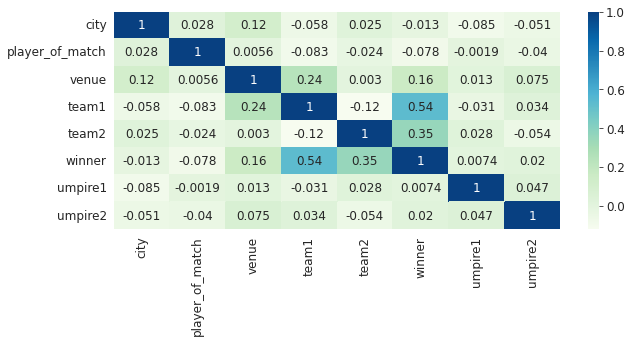

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(),annot=True,cmap="GnBu")
plt.show()

In [ ]:
train_y.dtype

dtype('int64')

In [ ]:
# train_y = train_y.astype('int32')

# Cast a pandas object to a specified dtype dtype.

### Working with classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)


RandomForestClassifier()

In [ ]:
new_x = pd.DataFrame(rfc.feature_importances_,index=train_x.columns,columns=['Importance'])
new_x.sort_values(by='Importance',ascending=False,inplace=True)
new_x

,Importance
player_of_match,0.187518
team2,0.177320
team1,0.176233
umpire1,0.132061
umpire2,0.132031
venue,0.102099
city,0.092739


In [ ]:
train_x.drop(columns=['city','umpire1','umpire2'],inplace=True)


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.25,random_state=45)

### Comparing Models

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report


svc = SVC(C=100,kernel='rbf')
svc.fit(X_train,y_train)
# svc.score(X_test,y_test)

#Predict the response for test dataset
y_pred = svc.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))




Accuracy: 0.28773584905660377


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
# neigh.score(X_test,y_test)


y_pred = neigh.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.30660377358490565


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.47641509433962265


In [ ]:
rfc2 = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.5566037735849056

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test,y_test)

# The XGBoost is an implementation of gradient 
# boosted decision trees algorithm and it is designed 
# for higher performance. The XGBoost gives speed and 
# performance in machine learning applications.

0.6320754716981132

#### HyperParameter Optimization

---



In [ ]:
params={
 "learning_rate"    : [ 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 5, 6, 7],
 "min_child_weight" : [ 1,2,3],
 "gamma"            : [ 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 ],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid_search=GridSearchCV(xgb_model,param_grid=params,n_jobs= -1,verbose=3)
grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=XGBClassifier(objective='multi:softprob'), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5],
                         'gamma': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.15, 0.2, 0.25, 0.3],
                         'max_depth': [5, 6, 7],
                         'min_child_weight': [1, 2, 3]},
             verbose=3)

In [ ]:
  grid_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1}

In [ ]:
xbg = XGBClassifier(n_estimators=100,colsample_bytree=0.3,
                  learning_rate=0.3,gamma=0.2,max_depth=3)
xbg.fit(train_x,train_y)

XGBClassifier(colsample_bytree=0.3, gamma=0.2, learning_rate=0.3,
              objective='multi:softprob')

In [ ]:
xbg.score(X_test,y_test)

0.9056603773584906

In [ ]:
# stratified k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


model =XGBClassifier(n_estimators = 100,colsample_bytree=0.3,
                  learning_rate=0.3,gamma=0.2,max_depth=7)
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold)


print("Average score: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Average score: 77.77% (3.69%)


## Testing for Test Data

In [ ]:
test2 = total[-60:]

# just take the 2021 matches as the test cases

test2.drop(columns= ['winner','city','umpire1','umpire2'],inplace=True)

In [ ]:
# test2

In [ ]:
preds = xbg.predict(test2)


In [ ]:
preds

array([11,  1,  4, 13,  7, 11, 13,  0,  7, 11,  1,  0,  1, 14,  0, 11,  7,
       13,  0,  1,  4, 11,  0,  7,  1, 10,  7, 13,  1,  0, 11, 14, 14,  4,
        0, 13, 14,  0,  7, 14,  4,  7, 11,  0,  4,  1,  0, 11,  4,  0,  7,
       11,  0,  4,  7,  1,  0,  4,  4,  4])

In [ ]:
new_preds = le.inverse_transform(preds)

In [ ]:
new_preds


array(['RCB', 'DC', 'KKR', 'RR', 'MI', 'RCB', 'RR', 'CSK', 'MI', 'RCB',
       'DC', 'CSK', 'DC', 'SRH', 'CSK', 'RCB', 'MI', 'RR', 'CSK', 'DC',
       'KKR', 'RCB', 'CSK', 'MI', 'DC', 'Punjab Kings', 'MI', 'RR', 'DC',
       'CSK', 'RCB', 'SRH', 'SRH', 'KKR', 'CSK', 'RR', 'SRH', 'CSK', 'MI',
       'SRH', 'KKR', 'MI', 'RCB', 'CSK', 'KKR', 'DC', 'CSK', 'RCB', 'KKR',
       'CSK', 'MI', 'RCB', 'CSK', 'KKR', 'MI', 'DC', 'CSK', 'KKR', 'KKR',
       'KKR'], dtype=object)

In [ ]:
actual = list(test2.team1)

print(actual)

[7, 0, 4, 10, 7, 11, 1, 10, 7, 11, 10, 0, 7, 10, 0, 13, 7, 4, 0, 1, 10, 11, 14, 13, 4, 10, 0, 13, 10, 0, 11, 13, 14, 7, 11, 1, 10, 4, 11, 13, 1, 10, 13, 14, 4, 7, 0, 11, 14, 0, 13, 14, 0, 4, 7, 1, 1, 11, 1, 0]


In [ ]:
preds

array([11,  1,  4, 13,  7, 11, 13,  0,  7, 11,  1,  0,  1, 14,  0, 11,  7,
       13,  0,  1,  4, 11,  0,  7,  1, 10,  7, 13,  1,  0, 11, 14, 14,  4,
        0, 13, 14,  0,  7, 14,  4,  7, 11,  0,  4,  1,  0, 11,  4,  0,  7,
       11,  0,  4,  7,  1,  0,  4,  4,  4])

In [ ]:

winner=[]

for i in range(60):
    if actual[i] == preds[i]:
        winner.append(1)
    else:
        winner.append(2)

In [ ]:
sub = {'id':test['id'],'winner':winner}
submission = pd.DataFrame(sub)
submission.to_csv('./drive/MyDrive/Pns_data/Result/final.csv',index=False)

In [ ]:
output = pd.read_csv("./drive/MyDrive/Pns_data/Result/final.csv")

# make sure to upload the new final.csv file into the drive!!

In [ ]:
# winner

temp=[2,2,1,1,1,1,2,2,1,1,
      2,1,2,2,1,2,2,1,1,1,
      2,1,2,2,2,1,2,1,2,1,
      2,1,2,2,2,1,1,2,1,2,
      2,2,2,2,2,2,2,1,2,2,
      2,1,2,1,1,2,2,2,2,1]

# print(len(temp))

In [ ]:
output.head(3)


,id,winner
0,1254058,2
1,1254059,2
2,1254060,1


In [ ]:
output

,id,winner
0,1254058,2
1,1254059,2
2,1254060,1
3,1254061,2
4,1254062,1
5,1254063,1
6,1254064,2
7,1254065,2
8,1254066,1
9,1254067,1


In [ ]:

list1 = temp
list2 = list(output['winner'])

In [ ]:
# Make dictionary, keys will become dataframe column names
dict_1 = {'Actual':list1, 'Predicted':list2}

final_df = pd.DataFrame(dict_1)

In [ ]:
final_df



,Actual,Predicted
0,2,2
1,2,2
2,1,1
3,1,2
4,1,1
5,1,1
6,2,2
7,2,2
8,1,1
9,1,1


### Thank you!